In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [2]:
archivo = '../data/metrics/todos.csv'
datos = pd.read_csv(archivo,index_col=0,parse_dates=True)
datos.columns

Index(['Ti_ae', 'Ti_bm', 'Ti_ca', 'Ti_za', 'Ti', 'To_esolmet'], dtype='object')

In [3]:
datos["Ti2"] = datos.Ti + 2

In [4]:
simulados=['Ti_ae', 'Ti_ca', 'Ti_bm', 'Ti_za',"Ti2"]

pearson = []
rmse    = []
Ti_mean = []
Ti_max  = []
Ti_min  = []
FD      = []

for simulado in simulados:
    pearson.append(datos.Ti.corr(datos[simulado]))
    rmse.append(((datos[simulado]-datos.Ti)**2).mean()**.5  )
    Ti_mean.append( abs(datos[simulado].mean() - datos.Ti.mean()) ) 
    Ti_max.append(  abs((datos[simulado].resample("1D").max() - datos.Ti.resample("1D").max()).mean())   )
    Ti_min.append(  abs((datos[simulado].resample("1D").min() - datos.Ti.resample("1D").min()).mean())   )
    fd_s = (datos[simulado].resample("1D").max() - datos[simulado].resample("1D").min())/(datos.To_esolmet.resample("1D").max() - datos.To_esolmet.resample("1D").min())
    fd_e = (datos.Ti.resample("1D").max() - datos.Ti.resample("1D").min())/(datos.To_esolmet.resample("1D").max() - datos.To_esolmet.resample("1D").min())
    FD.append(  abs(fd_s - fd_e).mean() )
df = pd.DataFrame({"casos":simulados,
                   "pearson":pearson,
                   "rmse":rmse,
                   "Ti_mean":Ti_mean,
                   "Ti_max":Ti_max,
                   "Ti_min":Ti_min,
                    "FD":FD})
df.set_index("casos",inplace=True)


print(df)

def normaliza(df,peso = 1.):
    df = (1. - df/df.max())*peso
    return df

df.rmse    = normaliza(df.rmse,peso=1.)
df.Ti_mean = normaliza(df.Ti_mean)
df.Ti_max  = normaliza(df.Ti_max)
df.Ti_min  = normaliza(df.Ti_min)
df.FD      = normaliza(df.FD)

print(df)
df["R"] = df.sum(axis=1)
df.sort_values(by="R",ascending=False)

        pearson      rmse   Ti_mean    Ti_max    Ti_min            FD
casos                                                                
Ti_ae  0.954001  0.701687  0.200250  0.056551  0.470789  8.560265e-02
Ti_ca  0.957310  0.672580  0.244576  0.449624  0.010481  8.506278e-02
Ti_bm  0.960271  0.786293  0.415252  0.171350  0.640877  5.594021e-02
Ti_za  0.958498  0.702647  0.311714  0.270284  0.329991  5.802046e-02
Ti2    1.000000  2.000000  2.000000  2.000000  2.000000  6.938894e-17
        pearson      rmse   Ti_mean    Ti_max    Ti_min        FD
casos                                                            
Ti_ae  0.954001  0.649156  0.899875  0.971724  0.764605  0.000000
Ti_ca  0.957310  0.663710  0.877712  0.775188  0.994760  0.006307
Ti_bm  0.960271  0.606853  0.792374  0.914325  0.679561  0.346513
Ti_za  0.958498  0.648676  0.844143  0.864858  0.835004  0.322212
Ti2    1.000000  0.000000  0.000000  0.000000  0.000000  1.000000


,pearson,rmse,Ti_mean,Ti_max,Ti_min,FD,R
casos,,,,,,,
Ti_za,0.958498,0.648676,0.844143,0.864858,0.835004,0.322212,4.473391
Ti_bm,0.960271,0.606853,0.792374,0.914325,0.679561,0.346513,4.299898
Ti_ca,0.957310,0.663710,0.877712,0.775188,0.994760,0.006307,4.274987
Ti_ae,0.954001,0.649156,0.899875,0.971724,0.764605,0.000000,4.239362
Ti2,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000


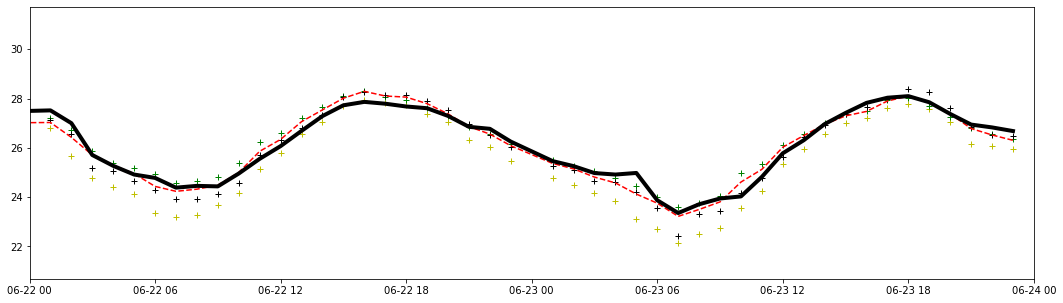

In [5]:
fig, ax = plt.subplots(figsize=(18,5))

fecha1 = parse("2019-06-22")
fecha2 = fecha1 + pd.Timedelta("2D")

ax.set_xlim(fecha1,fecha2)


ax.plot(datos.Ti_ae,'y+')
ax.plot(datos.Ti_bm,'g+')
ax.plot(datos.Ti_ca,'k+')
ax.plot(datos.Ti_za,'r--')

ax.plot(datos.Ti,'k-',linewidth=4)
